In [1]:
import sys
sys.path.append('../')

In [12]:
from data.get_data import get_data
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
batch_size = 10  # Kích thước batch
num_classes = 5  # 10 lớp
epochs = 10    # Số epoches

In [4]:
X, y = get_data()
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [5]:
weight_1 = np.random.uniform(-0.5, 0.5, (28, 784))
weight_2 = np.random.uniform(-0.5, 0.5, (10,28))
bias_1 = np.zeros((16, 1))
bias_2 = np.zeros((10, 1))

In [6]:

model = Sequential()

# input shape
model.add(Dense(10, activation='relu', input_shape=(16,)))
# model.add(Dense(28, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [8]:
H = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, # log or not
)

Epoch 1/10
20532/20532 [==============================] - 30s 1ms/step - loss: 0.5557 - accuracy: 0.9361
Epoch 2/10
20532/20532 [==============================] - 35s 2ms/step - loss: 0.1489 - accuracy: 0.9453
Epoch 3/10
20532/20532 [==============================] - 29s 1ms/step - loss: 0.1441 - accuracy: 0.9460
Epoch 4/10
20532/20532 [==============================] - 24s 1ms/step - loss: 0.1412 - accuracy: 0.9468
Epoch 5/10
20532/20532 [==============================] - 25s 1ms/step - loss: 0.1392 - accuracy: 0.9469
Epoch 6/10
20532/20532 [==============================] - 26s 1ms/step - loss: 0.1381 - accuracy: 0.9470
Epoch 7/10
20532/20532 [==============================] - 25s 1ms/step - loss: 0.1368 - accuracy: 0.9476
Epoch 8/10
20532/20532 [==============================] - 25s 1ms/step - loss: 0.1364 - accuracy: 0.9479
Epoch 9/10
20532/20532 [==============================] - 23s 1ms/step - loss: 0.1356 - accuracy: 0.9477
Epoch 10/10
20532/20532 [==============================

1605/1605 [==============================] - 1s 539us/step
+ precision = 0.494
+ recall = 0.336
+ f1_score = 0.345


/home/trhoan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


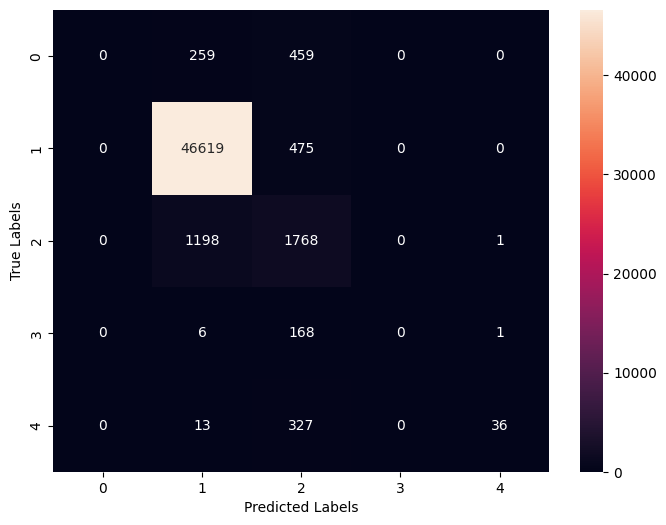

In [13]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred ,axis = 1)
y_true=np.argmax(y_test,axis = 1)
a = precision_recall_fscore_support(y_true, y_pred, average='macro')
cf = confusion_matrix(y_true,y_pred)

print(f'+ precision = {a[0]:.3f}')
print(f'+ recall = {a[1]:.3f}')
print(f'+ f1_score = {a[2]:.3f}')
plt.figure(figsize = (8,6))
ax = sns.heatmap(data=cf ,fmt="d",annot = True)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
plt.show()